# Training a Convolutional Neural Network



## Package Installations
**NOTE**: Everytime you start the GPU, run this before your code. 

In [ ]:
!pip install ipywidgets
#!pip list

In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

## Starter Code

**Remember** to DISABLE the GPU when you are not training.

Input size $(N,C_{in},H,W)$ output $(N,C_{out},H_{out},W_{out})$:
$$out(N_{i},C_{out_{j}})=bias(C_{out_{j}})+\sum_{c_{in}-1}^{k=0}weight(C_{out_{j},k}) input(N_{i},k)$$

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import transforms

def train(model, train_loader, cost, optimizer, epoch):
    model.train()
    for e in range(epoch):
        running_loss=0
        correct=0
        for data, target in train_loader:
            optimizer.zero_grad()
            #NOTE: Notice how we are not changing the data shape here
            # This is because CNNs expects a 3 dimensional input
            pred = model(data)
            loss = cost(pred, target)
            running_loss+=loss
            loss.backward()
            optimizer.step()
            pred=pred.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
        print(f"Epoch {e}: Loss {running_loss/len(train_loader.dataset)}, Accuracy {100*(correct/len(train_loader.dataset))}%")

def test(model, test_loader):
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            #NOTE: Notice how we are not changing the data shape here
            # This is because CNNs expects a 3 dimensional input
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    print(f'Test set: Accuracy: {correct}/{len(test_loader.dataset)} = {100*(correct/len(test_loader.dataset))}%)')

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


batch_size = 32 
epoch=10

training_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

testing_transform = transforms.Compose([transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
        download=True, transform=training_transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
        shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
        download=True, transform=testing_transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
        shuffle=False)

model=Model()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

train(model, trainloader, criterion, optimizer, epoch)
test(model, testloader)


Files already downloaded and verified
Files already downloaded and verified
Epoch 0: Loss 0.06159891560673714, Accuracy 29.365999999999996%
Epoch 1: Loss 0.04815094545483589, Accuracy 44.282%
Epoch 2: Loss 0.04282333329319954, Accuracy 50.834%
Epoch 3: Loss 0.03935938701033592, Accuracy 55.206%
Epoch 4: Loss 0.03641137108206749, Accuracy 58.786%
Epoch 5: Loss 0.03385612741112709, Accuracy 61.80799999999999%
Epoch 6: Loss 0.031857963651418686, Accuracy 64.262%
Epoch 7: Loss 0.030192814767360687, Accuracy 66.25999999999999%
Epoch 8: Loss 0.028778495267033577, Accuracy 67.926%
Epoch 9: Loss 0.027439597994089127, Accuracy 69.384%
Test set: Accuracy: 6847/10000 = 68.47%)


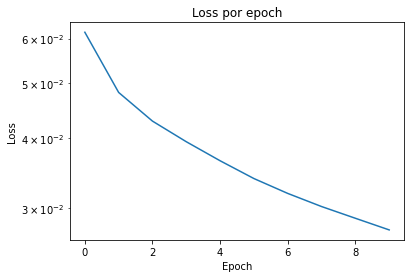

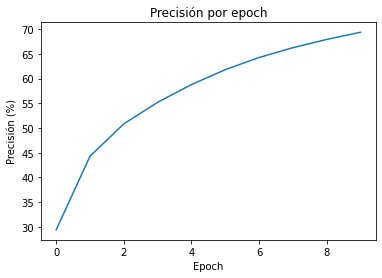

Test set: Accuracy: 68.47%


In [8]:
import matplotlib.pyplot as plt
epoch_losses = [0.06159891560673714, 0.04815094545483589, 0.04282333329319954, 0.03935938701033592, 0.03641137108206749, 0.03385612741112709, 0.031857963651418686, 0.030192814767360687, 0.028778495267033577, 0.027439597994089127]
epoch_accs = [29.365999999999996, 44.282, 50.834, 55.206, 58.786, 61.80799999999999, 64.262, 66.25999999999999, 67.926, 69.384]
test_acc = 68.47

plt.plot(epoch_losses)
plt.yscale('log')
plt.title('Loss por epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(epoch_accs)
plt.title('Precisión por epoch')
plt.xlabel('Epoch')
plt.ylabel('Precisión (%)')
plt.show()

print(f'Test set: Accuracy: {test_acc}%')

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

train(model, trainloader, criterion, optimizer, epoch)
test(model, testloader)

Epoch 0: Loss 0.032168880105018616, Accuracy 63.786%
Epoch 1: Loss 0.0270579531788826, Accuracy 69.45%
Epoch 2: Loss 0.02379031479358673, Accuracy 73.584%
Epoch 3: Loss 0.021746698766946793, Accuracy 75.94999999999999%
Epoch 4: Loss 0.0198497474193573, Accuracy 77.9%
Epoch 5: Loss 0.018162311986088753, Accuracy 79.746%
Epoch 6: Loss 0.01694430597126484, Accuracy 81.092%
Epoch 7: Loss 0.015325847081840038, Accuracy 82.92%
Epoch 8: Loss 0.014200606383383274, Accuracy 84.24199999999999%
Epoch 9: Loss 0.013270452618598938, Accuracy 85.36200000000001%
Test set: Accuracy: 7275/10000 = 72.75%)


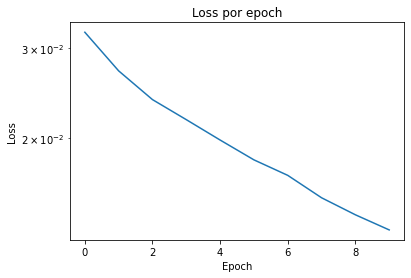

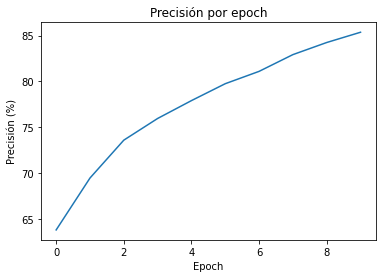

Test set: Accuracy: 72.75%


In [17]:
loss_values = [0.032168880105018616, 0.0270579531788826, 0.02379031479358673, 0.021746698766946793, 0.0198497474193573, 0.018162311986088753, 0.01694430597126484, 0.015325847081840038, 0.014200606383383274, 0.013270452618598938]
accuracy_values = [63.786, 69.45, 73.584, 75.94999999999999, 77.9, 79.746, 81.092, 82.92, 84.24199999999999, 85.36200000000001]

plt.plot(loss_values)
plt.yscale('log')
plt.title('Loss por epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(accuracy_values)
plt.title('Precisión por epoch')
plt.xlabel('Epoch')
plt.ylabel('Precisión (%)')
plt.show()

print(f'Test set: Accuracy: 72.75%')

In [10]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 128, 3)       # New convolutional layer
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 2 * 2, 128)   # Linear input updated size
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv3(x)))     # New convolutional layer
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 128 * 2 * 2)              # Linear input updated size
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
training_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

train(model, trainloader, criterion, optimizer, epoch)
test(model, testloader)

Epoch 0: Loss 0.012651032768189907, Accuracy 85.964%
Epoch 1: Loss 0.011827301234006882, Accuracy 86.894%
Epoch 2: Loss 0.010919571854174137, Accuracy 87.89200000000001%
Epoch 3: Loss 0.010571913793683052, Accuracy 88.14800000000001%
Epoch 4: Loss 0.009812328033149242, Accuracy 88.974%
Epoch 5: Loss 0.009148461744189262, Accuracy 89.84400000000001%
Epoch 6: Loss 0.008633904159069061, Accuracy 90.5%
Epoch 7: Loss 0.008602121844887733, Accuracy 90.53999999999999%
Epoch 8: Loss 0.008269508369266987, Accuracy 90.912%
Epoch 9: Loss 0.007995662279427052, Accuracy 91.392%
Test set: Accuracy: 7083/10000 = 70.83%)


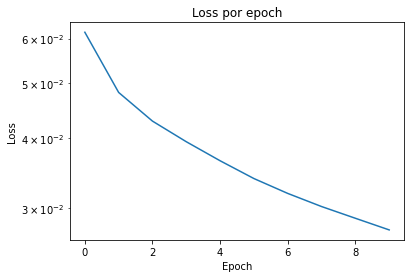

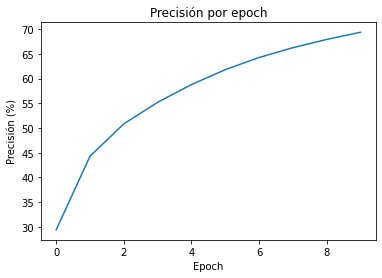

Test set: Accuracy: 70.83%


In [16]:
loss_values = [0.06159891560673714, 0.04815094545483589, 0.04282333329319954, 0.03935938701033592, 0.03641137108206749, 0.03385612741112709, 0.031857963651418686, 0.030192814767360687, 0.028778495267033577, 0.027439597994089127]
accuracy_values = [29.365999999999996, 44.282, 50.834, 55.206, 58.786, 61.80799999999999, 64.262, 66.25999999999999, 67.926, 69.384]

plt.plot(epoch_losses)
plt.yscale('log')
plt.title('Loss por epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(epoch_accs)
plt.title('Precisión por epoch')
plt.xlabel('Epoch')
plt.ylabel('Precisión (%)')
plt.show()
print(f'Test set: Accuracy: 70.83%')

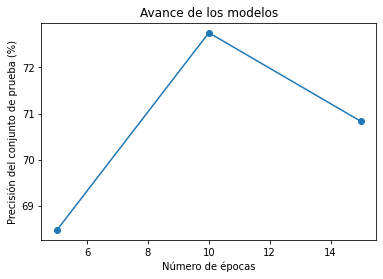

In [18]:
import matplotlib.pyplot as plt

accs = [68.47, 72.75, 70.83]
epochs = [5, 10, 15]

plt.plot(epochs, accs, 'o-')
plt.xlabel('Número de épocas')
plt.ylabel('Precisión del conjunto de prueba (%)')
plt.title('Avance de los modelos')
plt.show()